In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")

In [10]:
X = []
Y = []
for i in range(7):
    x = np.load(f"./MNIST/{i}/data.npz")['x']
    y = np.load(f"./MNIST/{i}/data.npz")['y']
    X.append(x)
    Y.append(y)

In [3]:
colors = [
    "#F27970",
    "#BB9727",
    "#54B345",
    "#05B9E2",
    "#8983BF",
    "#C76DA2",
    "#934B43",
    "#F1D77E",
    "#5F97D2",
    "#A5B6C5",
    "#32B897",
    "#54a0ff",
    "#5f27cd"
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


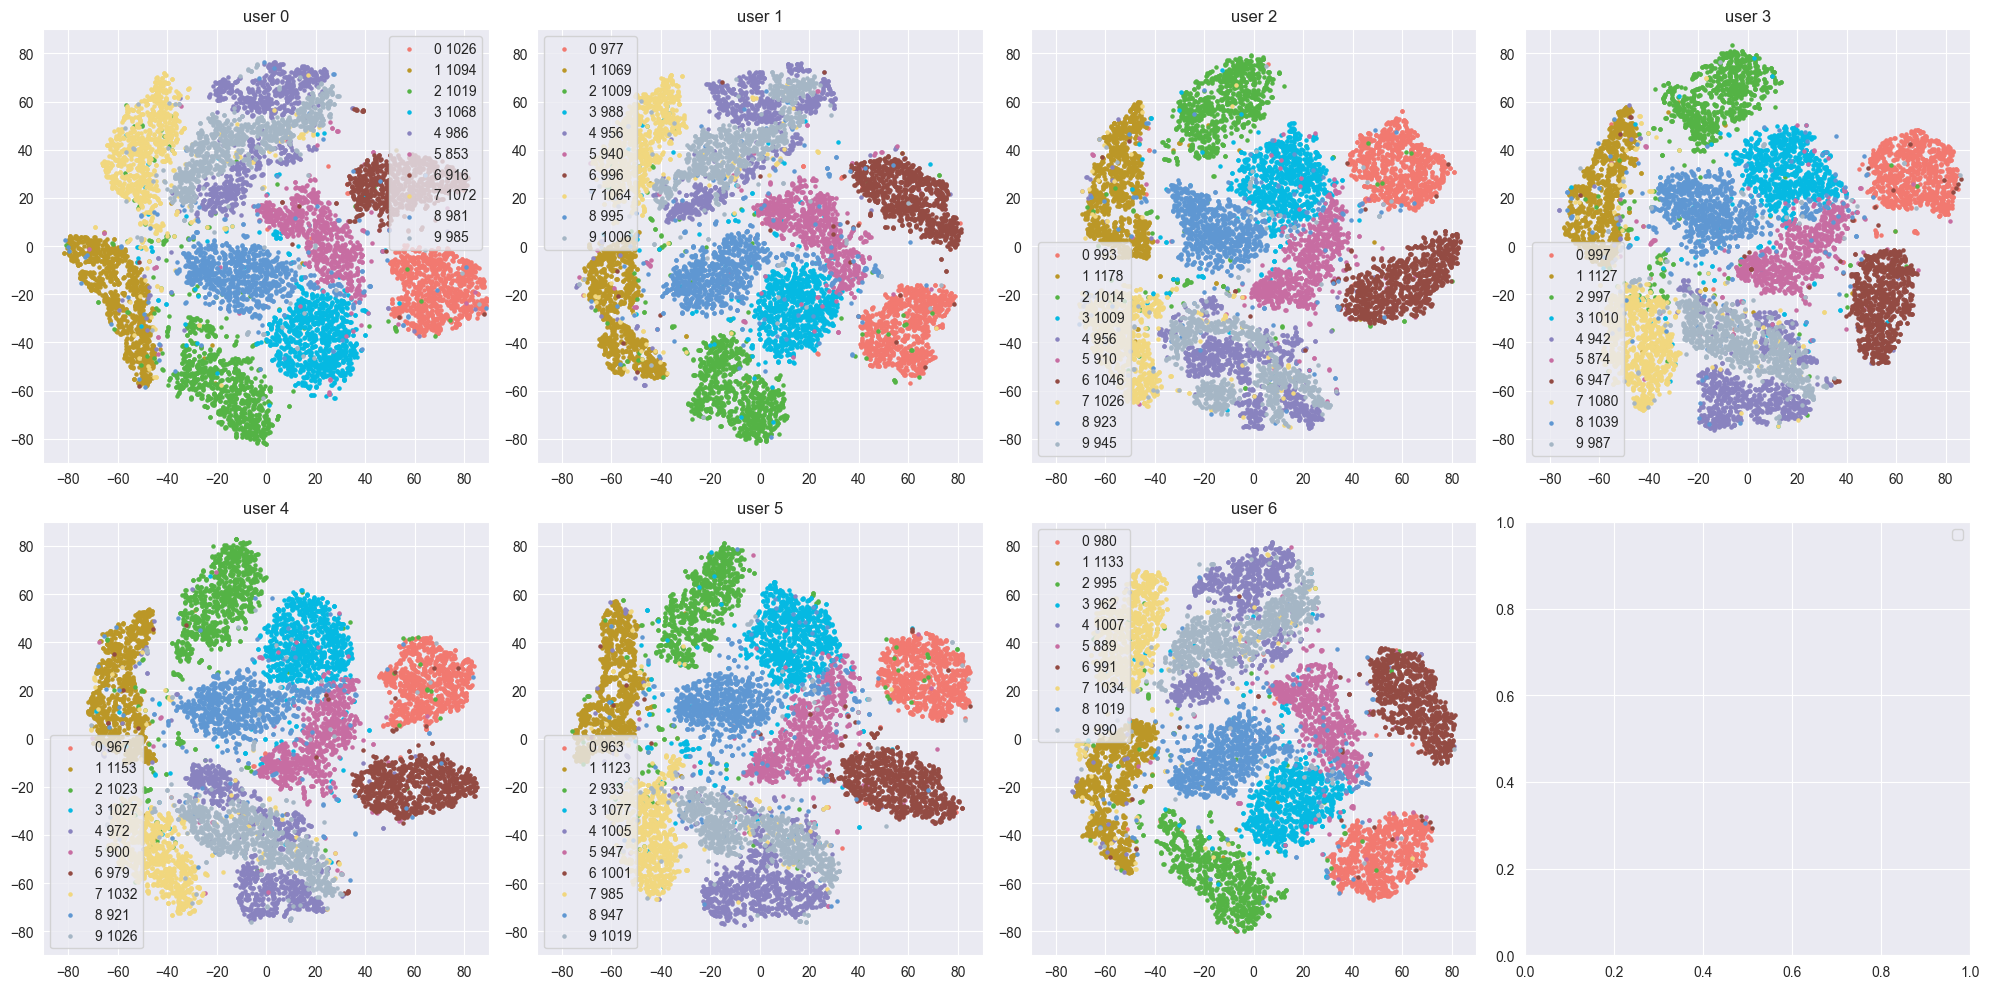

In [4]:
reduce_X = []
for i in range(len(Y)):
    pre_data = np.reshape(X[i], (X[i].shape[0], -1))
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, learning_rate=200)
    reduce_data = tsne.fit_transform(pre_data)
    reduce_X.append(reduce_data)

# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(2, 4, figsize=(4*5, 2*5))

# for i in range(36):
#     plt.scatter(reduce_X[i][:, 0], reduce_X[i][:, 1], c=colors[i], label=f"user {i}", s=10)
for i, ax in enumerate(axes.flatten()[:-1]):
    for j in range(10):
        ax.scatter(reduce_X[i][Y[i] == j][:, 0], reduce_X[i][Y[i] == j][:, 1], c=colors[j], label=f"{j} {len(reduce_X[i][Y[i] == j])}", s=5)
        ax.legend()
        ax.set_title(f"user {i}")
        ax.set_xlim(-90, 90)
        ax.set_ylim(-90, 90)

plt.legend()
plt.tight_layout()
plt.savefig("iidMNIST_distribution.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.show()

<Figure size 600x400 with 0 Axes>

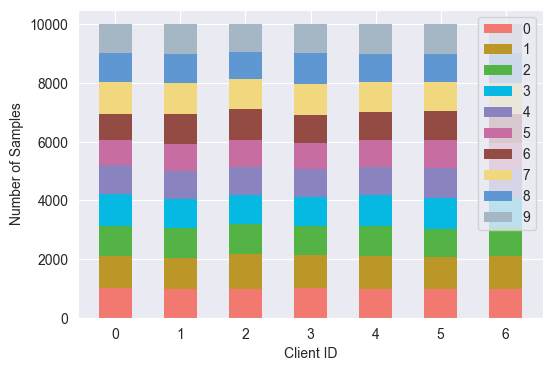

In [11]:
classes = []
for i in range(10):
    client_classes = []
    for j in range(7):
        client_classes.append((Y[j][Y[j] == i]).shape[0])
    classes.append(client_classes)

species = (0, 1, 2, 3, 4, 5, 6)
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots(figsize=(6, 4))
bottom = np.zeros(7)

for i in range(10):
    p = ax.bar(species, classes[i], 0.5, label=f"{i}", bottom=bottom, color=colors[i], edgecolor="none")
    bottom += classes[i]


plt.legend(loc="upper right")
plt.xlabel("Client ID")
plt.ylabel("Number of Samples")
plt.savefig("iid_mnist_label_dist.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.show()

In [6]:
for i in range(6):
    train_x = np.load(f"./MNIST/{i}/train.npz")['x']
    train_y = np.load(f"./MNIST/{i}/train.npz")['y']
    test_x = np.load(f"./MNIST/{i}/test.npz")['x']
    test_y = np.load(f"./MNIST/{i}/test.npz")['y']
    np.savez(f"./MNIST/{i}/data.npz", x=np.concatenate((train_x, test_x), axis=0), y=np.concatenate((train_y, test_y), axis=0))

In [12]:
X = []
Y = []
for i in range(20):
    x = np.load(f"./MNISTNONIID/{i}/data.npz")['x']
    y = np.load(f"./MNISTNONIID/{i}/data.npz")['y']
    X.append(x)
    Y.append(y)

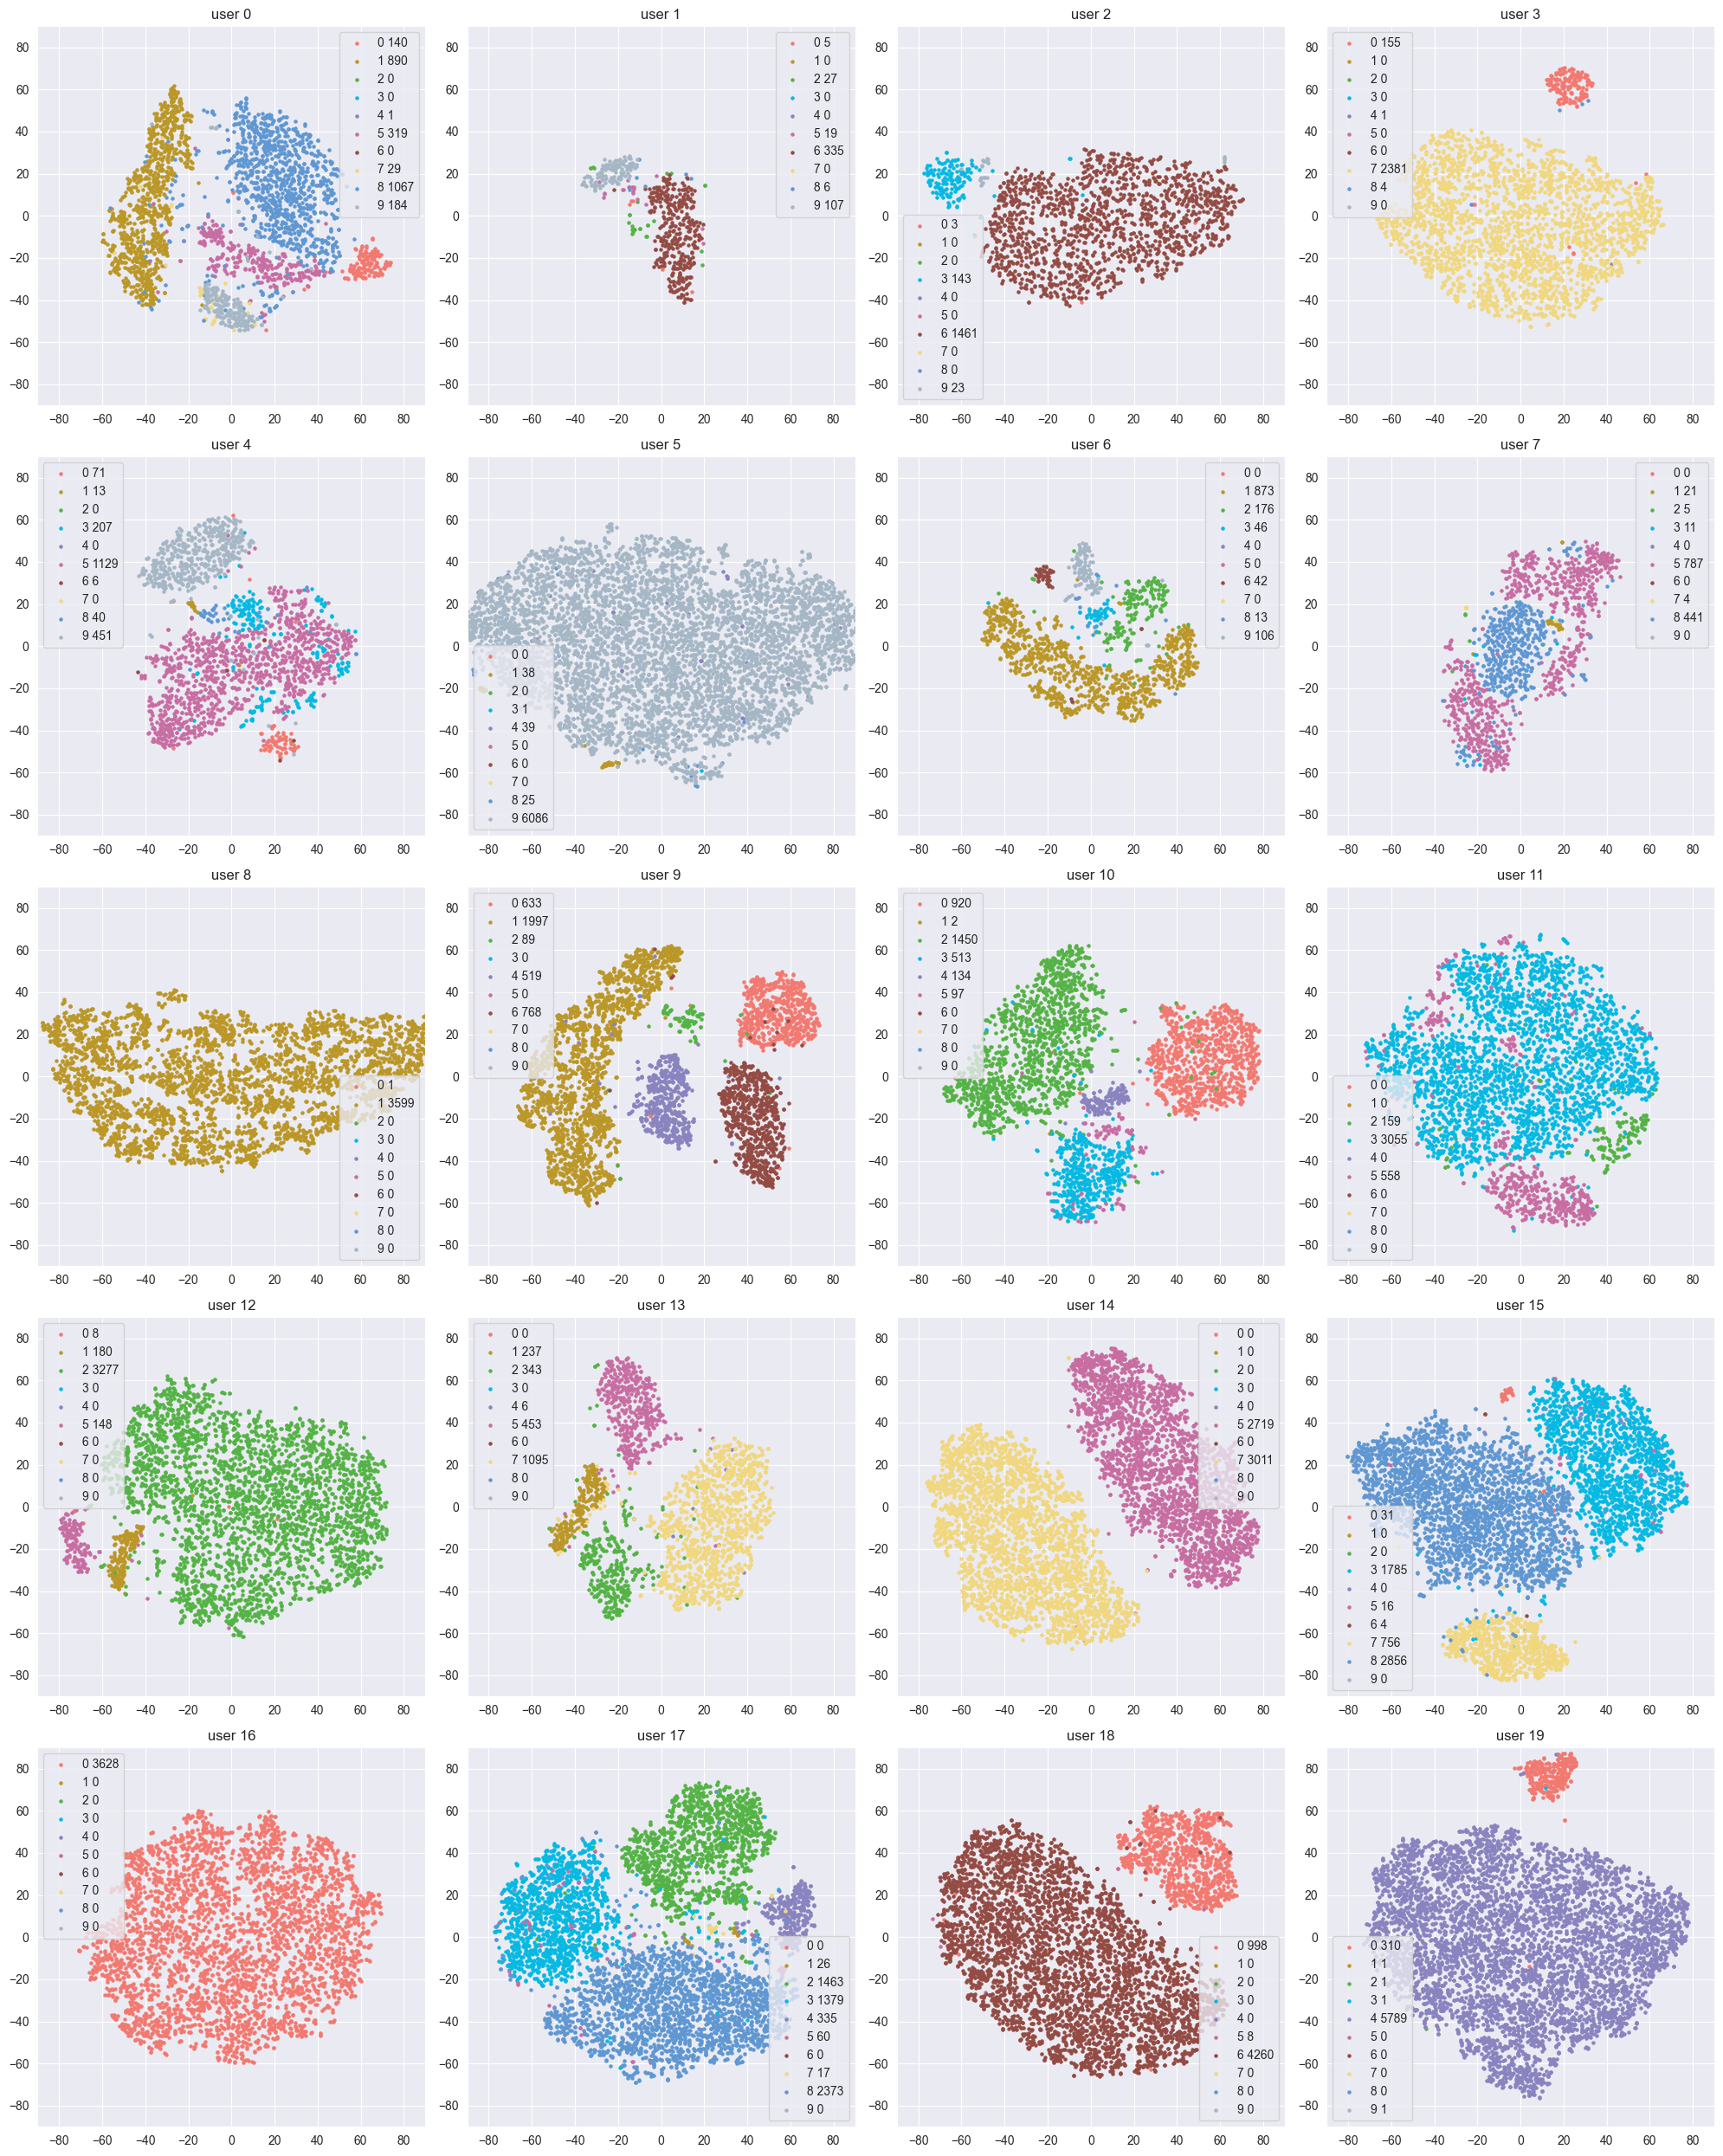

In [8]:
reduce_X = []
for i in range(len(Y)):
    pre_data = np.reshape(X[i], (X[i].shape[0], -1))
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    reduce_data = tsne.fit_transform(pre_data)
    reduce_X.append(reduce_data)

# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(5, 4, figsize=(4*5, 5*5))

# for i in range(36):
#     plt.scatter(reduce_X[i][:, 0], reduce_X[i][:, 1], c=colors[i], label=f"user {i}", s=10)
for i, ax in enumerate(axes.flatten()):
    for j in range(10):
        ax.scatter(reduce_X[i][Y[i] == j][:, 0], reduce_X[i][Y[i] == j][:, 1], c=colors[j], label=f"{j} {len(reduce_X[i][Y[i] == j])}", s=5)
        ax.legend()
        ax.set_title(f"user {i}")
        ax.set_xlim(-90, 90)
        ax.set_ylim(-90, 90)
        

plt.legend()
plt.tight_layout()
plt.savefig("non-iidMNIST_distribution.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.show()

<Figure size 600x400 with 0 Axes>

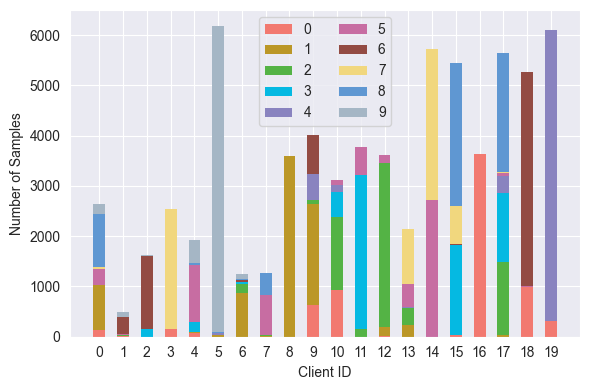

In [13]:
classes = []
for i in range(10):
    client_classes = []
    for j in range(20):
        client_classes.append((Y[j][Y[j] == i]).shape[0])
    classes.append(client_classes)

plt.figure(figsize=(6, 4))
species = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
fig, ax = plt.subplots(figsize=(6, 4))
bottom = np.zeros(20)

for i in range(10):
    p = ax.bar(species, classes[i], 0.5, label=f"{i}", bottom=bottom, color=colors[i], edgecolor="none")
    bottom += classes[i]


plt.xlabel("Client ID")
plt.ylabel("Number of Samples")
plt.legend(loc='upper center', ncols=2)
plt.xticks(np.arange(0, 20, 1))
plt.tight_layout()
plt.savefig("non-iid_mnist_label_dist.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.show()